<a href="https://colab.research.google.com/github/aliroshandel98/Pytorch/blob/main/01_Workflow_Python_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello and welcome guys
My name is ali and today im gonna do exercises in one another courses in pytorch zero to mastery.

here is the course:https://www.learnpytorch.io

Im so glad that youre with me during my way to know coding and doing deep learning with pytorch.

## Lets go

In [40]:
import torch
from torch import nn
import matplotlib.pyplot as plt

##1.Create a straight line dataset using the linear regression formula (weight * X + bias).
Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

Split the data into 80% training, 20% testing.

Plot the training and testing data so it becomes visual.

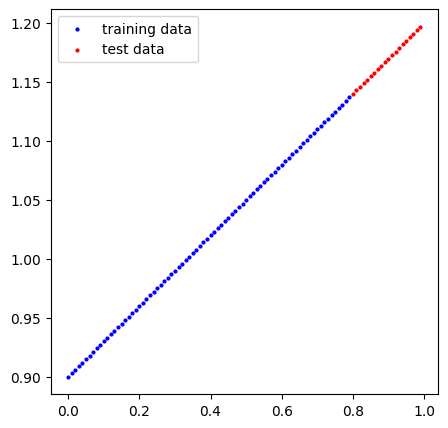

In [41]:
weight = 0.3
bias = 0.9

datapoints = 100
start = 0
end = 1
step = float((end - start) / datapoints)
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias
sample = int(0.8*len(x))
x_train = x[:sample]
y_train = y[:sample]
x_test = x[sample:]
y_test = y[sample:]
def plot(x_train, y_train, x_test, y_test):
  plt.figure(figsize=(5,5))
  plt.scatter(x_train, y_train, label='training data', s=4, c='b')
  plt.scatter(x_test, y_test, label='test data', s=4, c='r')
  plt.legend()
plot(x_train, y_train, x_test, y_test)

#2.Build a PyTorch model by subclassing nn.Module.

Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.

Implement the forward() method to compute the linear regression function you used to create the dataset in 1.

Once you've constructed the model, make an instance of it and check its state_dict().

Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [42]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer = nn.Linear(in_features=1,
                           out_features=1,
                           bias=True)

  def forward(self, x: torch.tensor) -> torch.Tensor:
    return self.layer(x)

model = LinearRegressionModel()
model.state_dict()

OrderedDict([('layer.weight', tensor([[0.0979]])),
             ('layer.bias', tensor([0.8975]))])

##3.Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.

Write a training loop to perform the appropriate training steps for 300 epochs.

The training loop should test the model on the test dataset every 20 epochs.

In [43]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)
epochs = 300
for epoch in range(epochs):
  model.train()
  y_preds = model(x_train)
  loss = loss_fn(y_preds, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch % 15 == 0:
    model.eval()
    with torch.inference_mode():
      y_preds_test = model(x_test)
      test_loss = loss_fn(y_preds_test, y_test)
    print(f"loss: {loss}")


loss: 0.0823858231306076
loss: 0.03111877106130123
loss: 0.025657350197434425
loss: 0.020518703386187553
loss: 0.01538006216287613
loss: 0.010241423733532429
loss: 0.005102775990962982
loss: 0.007540355436503887
loss: 0.004019889049232006
loss: 0.007540355436503887
loss: 0.004019889049232006
loss: 0.007540355436503887
loss: 0.004019889049232006
loss: 0.007540355436503887
loss: 0.004019889049232006
loss: 0.007540355436503887
loss: 0.004019889049232006
loss: 0.007540355436503887
loss: 0.004019889049232006
loss: 0.007540355436503887


#4.Make predictions with the trained model on the test data.

###Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

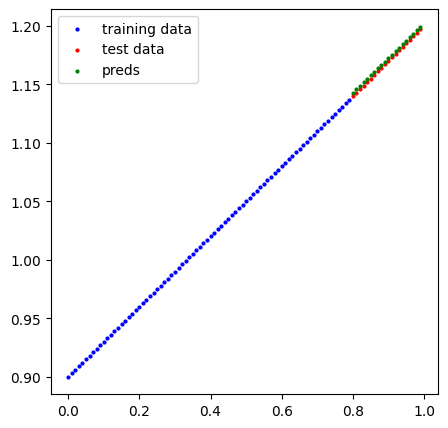

In [50]:
def plot(x_train, y_train, x_test, y_test, predictions=None):
  plt.figure(figsize=(5,5))
  plt.scatter(x_train, y_train, label='training data', s=4, c='b')
  plt.scatter(x_test, y_test, label='test data', s=4, c='r')
  if predictions != None:
    plt.scatter(x_test, predictions, label='preds', s=4, c='g')
  plt.legend()
model.eval()
with torch.inference_mode():
  preds = model(x_test)
plot(x_train, y_train, x_test, y_test, preds)

## 5.Save your trained model's state_dict() to file.

Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.

Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [51]:
from pathlib import Path
MODEL_PATH = Path("exercises")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "exercise_model_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

In [52]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.eval()
with torch.inference_mode():
  y_predsL = loaded_model(x_test)
lossL = loss_fn(y_predsL, y_test)
y_predsL == preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])